In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
df=pd.read_csv("C:\\Users\\mejar\\OneDrive\\Documents\\Forest_fire.csv")
df

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Jharkand,40,45,20,1
1,Bangalore,50,30,10,1
2,Ecuador,10,20,70,0
3,a,60,45,70,1
4,Bangalore,30,48,10,1
5,c,50,15,30,0
6,de,5,35,35,0
7,asd,5,20,70,0
8,Ecuador,60,32,19,1
9,r,30,50,45,1


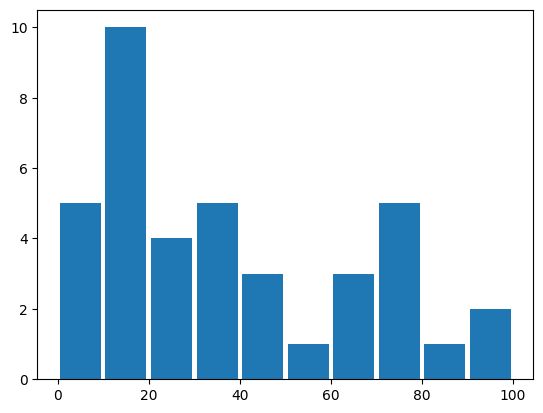

In [4]:
plt.hist(df.Humidity,rwidth=0.9)
plt.show()

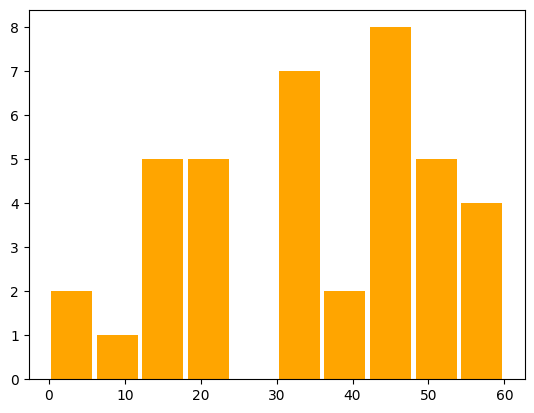

In [5]:
plt.hist(df.Temperature,rwidth=0.9,color="orange")
plt.show()

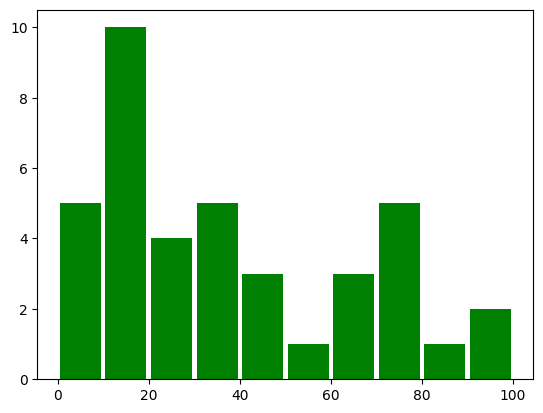

In [6]:
plt.hist(df.Humidity,rwidth=0.9,color="g")
plt.show()

In [7]:
x=df.drop(["Fire Occurrence","Area"],axis="columns")
y=df["Fire Occurrence"]
x.head()

,Oxygen,Temperature,Humidity
0,40,45,20
1,50,30,10
2,10,20,70
3,60,45,70
4,30,48,10


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [9]:
df.isna().sum()

Area               10
Oxygen              0
Temperature         0
Humidity            0
Fire Occurrence     0
dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(LinearRegression(),X_train,y_train)
print(f"score_lr = {score_lr}")
score_logr=cross_val_score(LogisticRegression(),X_train,y_train)
print(f"score_logr = {score_logr}")
score_svc=cross_val_score(SVC(),X_train,y_train)
print(f"score_svc = {score_svc}")
score_rc=cross_val_score(RandomForestClassifier(),X_train,y_train)
print(f"score_rc = {score_rc}")
score_dc=cross_val_score(DecisionTreeClassifier(),X_train,y_train)
print(f"score_dc = {score_dc}")


score_lr = [0.63647388 0.27227737 0.7178056  0.69507912 0.807262  ]
score_logr = [0.83333333 1.         1.         1.         1.        ]
score_svc = [0.83333333 0.8        1.         1.         1.        ]
score_rc = [0.83333333 0.8        1.         1.         1.        ]
score_dc = [1.  0.8 0.6 1.  1. ]


In [14]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
model.predict([[40,45,20]])

array([1], dtype=int64)

In [12]:
import pickle
pickle.dump(model,open("model.pkl","wb"))
model=pickle.load(open("model.pkl","rb"))